# Listing 2.1 Loading the MNIST dataset in Keras
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/home/mqasim/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mqasim/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mqasim/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mqasim/anaconda3/lib/python3.7/site-packages/tensorboar

In [2]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [3]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [4]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

Class Label: 3


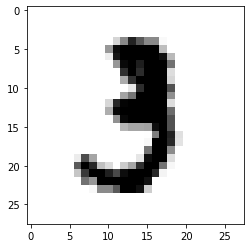

In [3]:
import matplotlib.pyplot as plt

index = 10

digit = train_images[index]
print("Class Label:",train_labels[index])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 7


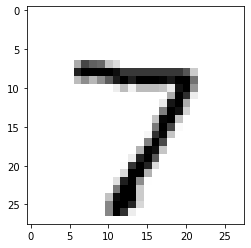

In [6]:
digit = test_images[0]
print("Class Label:",test_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
import numpy as np
print(train_labels)
print(len(train_labels))
print(np.unique(train_labels))

[5 0 4 ... 5 6 8]
60000
[0 1 2 3 4 5 6 7 8 9]


In [5]:
import numpy as np
print(test_labels)
print(len(test_labels))
print(np.unique(test_labels))

[7 2 1 ... 4 5 6]
10000
[0 1 2 3 4 5 6 7 8 9]


In [8]:
a = np.array([1,2,3,7])
print(a.ndim)
a.shape

1


(4,)

In [14]:
b = np.random.randint(0,255 ,size=(28,28))
print(b.shape)
b1 = b.ravel()
print(b1.shape)

# input_shape=(28*28, )
# input_shape=(784,)

(28, 28)
(784,)


# Listing 2.2 The network architecture
* Model
    * Sequential
        * we will use from chapter1 to chapter6
        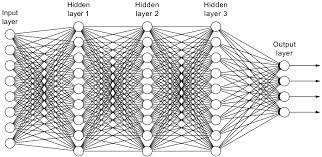
    * Functional API
        * we can arrange layer connection by ourself
        
* Layer
    * here we can use different types of layers
    * Dense
    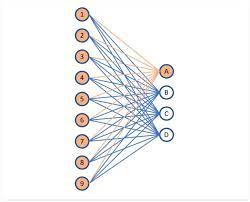
    * Conv2D
    * Conv1d
    * RNN
    * CNN
    * GRU

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

# network.add(layers.Dense(output,activation_function,input_shape))
# network.add(layers.Dense(512,activation='relu',input_shape=(784,)))

# set your last layer activation function with page 114
#Multiclass, single-label classification, softmax,categorical_crossentropy
#number output = always equal to your unique classes count

# output should be set with 2 power increment
# [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]



# Listing 2.3 The compilation step

In [22]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#optimizer = rmsprop
#metrics = ['f1','precesion','accuracy']
#loss function = you see from page 114

In [25]:
train_images.shape

(60000, 28, 28)

In [27]:
250/255

0.9803921568627451

# Listing 2.4 Preparing the image data

In [28]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

In [29]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


Class Label: 5


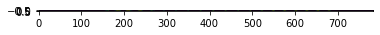

In [33]:
digit = train_images[0]
print("Class Label:",train_labels[0])
#digit.shape

plt.imshow([digit])
plt.show()

# Listing 2.5 Preparing the labels

In [14]:
train_labels[0]

5

# One-Hot-Encoding

In [34]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Now Train your Model

In [37]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.4327 - accuracy: 0.8729
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1149 - accuracy: 0.9658
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0693 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0477 - accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0346 - accuracy: 0.9897


# Now check result on test dataset

In [38]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9781
test_acc: 0.9781000018119812
